In [1]:
# This application analyzis the data and plotting data.
# Author: Svitlana Kozlovska

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset from the provided URL, skipping the first 23 rows because they contain metadata.
df = pd.read_csv(
    "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv",
    skiprows=23
)

/tmp/ipykernel_16315/428671351.py:2: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


In [8]:
# Convert the 'date' column to datetime format for easier manipulation and analysis.
df['date'] = pd.to_datetime(df['date'].astype(str), format='%d-%b-%Y %H:%M')

ValueError: time data "1996-04-10 14:00:00" doesn't match format "%d-%b-%Y %H:%M", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

### 1. Plot: The temperature

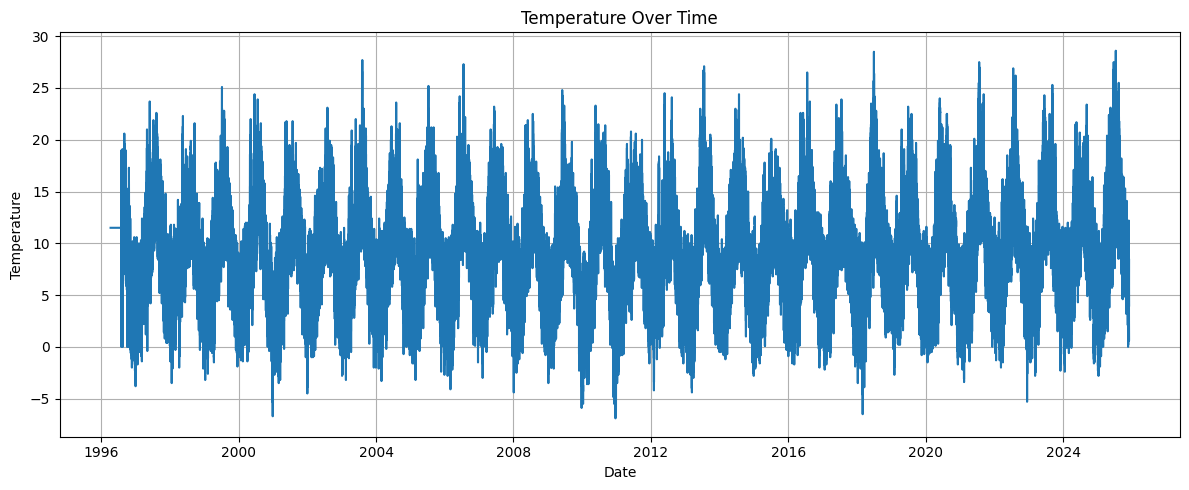

In [4]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x='date', y='temp')
plt.title("Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.grid(True)
plt.tight_layout()
plt.show()

2. Plot: The mean temperature each day

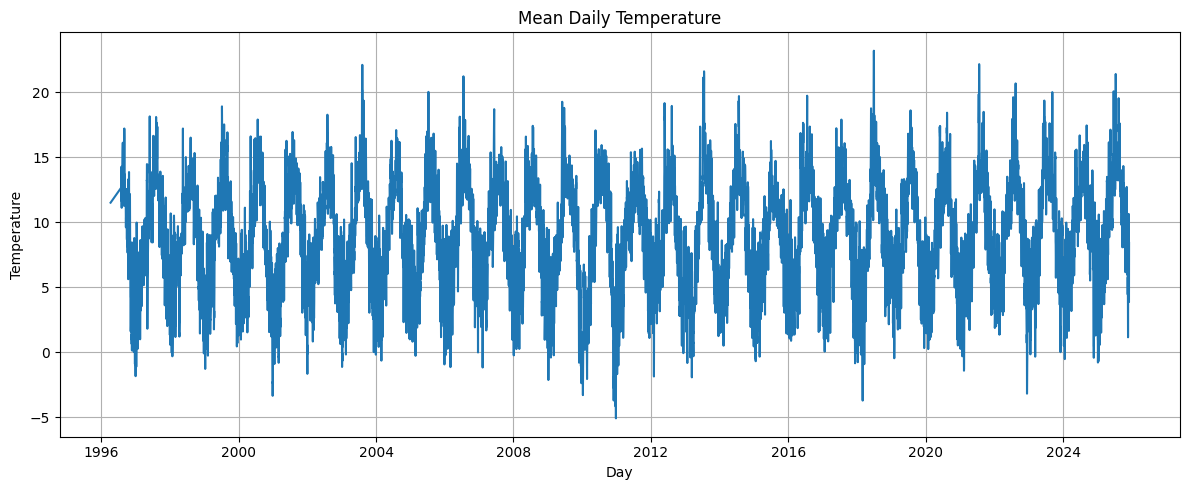

In [5]:
df['day'] = df['date'].dt.date
daily_mean = df.groupby('day')['temp'].mean().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=daily_mean, x='day', y='temp')
plt.title("Mean Daily Temperature")
plt.xlabel("Day")
plt.ylabel("Temperature")
plt.grid(True)
plt.tight_layout()
plt.show()

3.Plot: The mean temperature each month

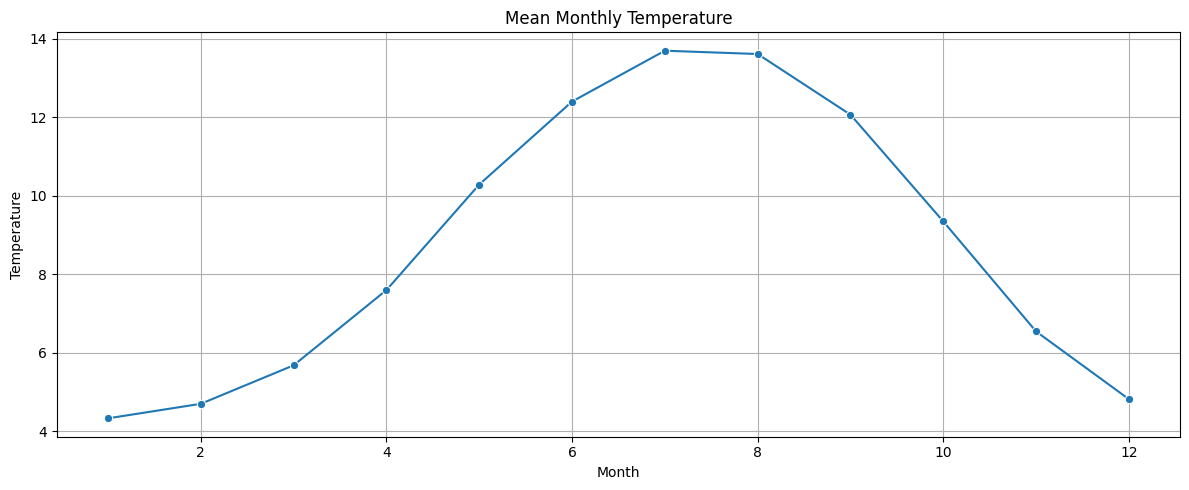

In [6]:
df['month'] = df['date'].dt.month
monthly_mean = df.groupby('month')['temp'].mean().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_mean, x='month', y='temp', marker="o")
plt.title("Mean Monthly Temperature")
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.grid(True)
plt.tight_layout()
plt.show()

### Plotting The Windspeed

TypeError: 'value' must be an instance of str or bytes, not a int

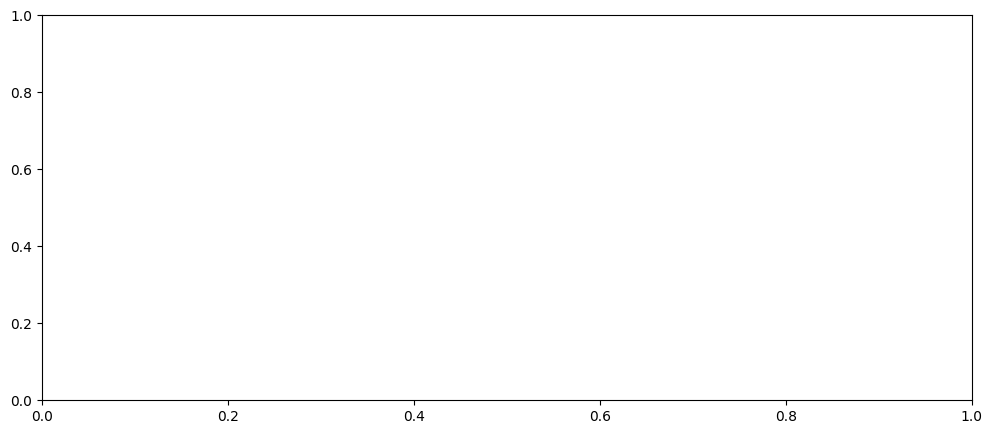

In [9]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x='date', y='wdsp')
plt.title("Windspeed Over Time")
plt.xlabel("Date")
plt.ylabel("Windspeed")
plt.grid(True)
plt.show()

Plotting the rolling windspeed

In [ ]:
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')

# Calculate the 24-hour rolling mean of windspeed.
rolling_24 = df['wdsp'].rolling(24).mean()

plt.figure(figsize=(12,5))
sns.lineplot(x=df['date'], y=rolling_24)
plt.title("24-Hour Rolling Windspeed")
plt.xlabel("Date")
plt.ylabel("Rolling Windspeed (24h)")
plt.grid(True)
plt.show()

Plotting the mean temperature each day

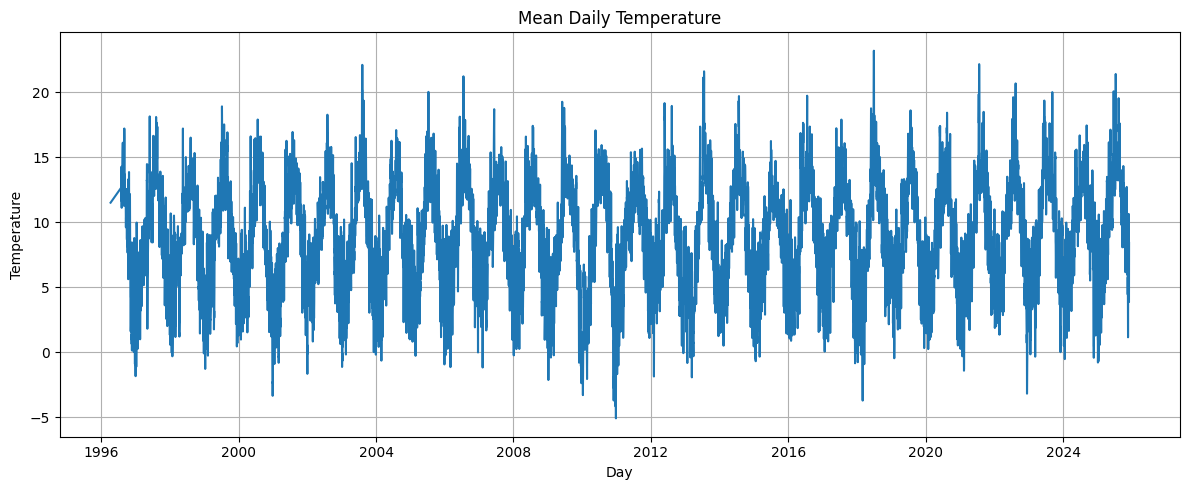

In [ ]:
df['day'] = df['date'].dt.date
daily_mean = df.groupby('day')['temp'].mean().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=daily_mean, x='day', y='temp')
plt.title("Mean Daily Temperature")
plt.xlabel("Day")
plt.ylabel("Temperature")
plt.grid(True)
plt.tight_layout()
plt.show()

Plotting the mean temperature each month

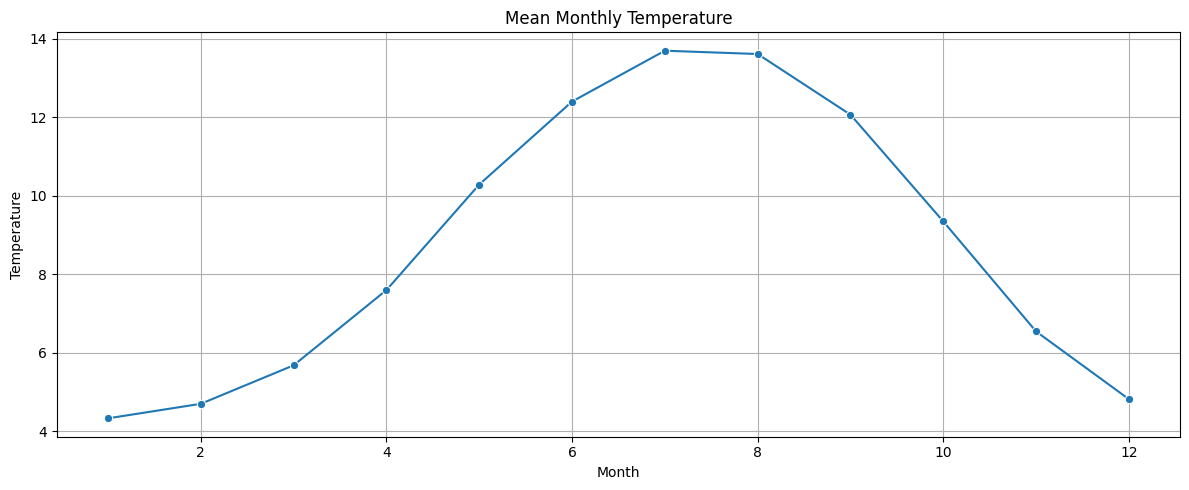

In [ ]:
df['month'] = df['date'].dt.month
monthly_mean = df.groupby('month')['temp'].mean().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_mean, x='month', y='temp', marker="o")
plt.title("Mean Monthly Temperature")
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.grid(True)
plt.tight_layout()
plt.show()